### Linear overlay mixture spectrum

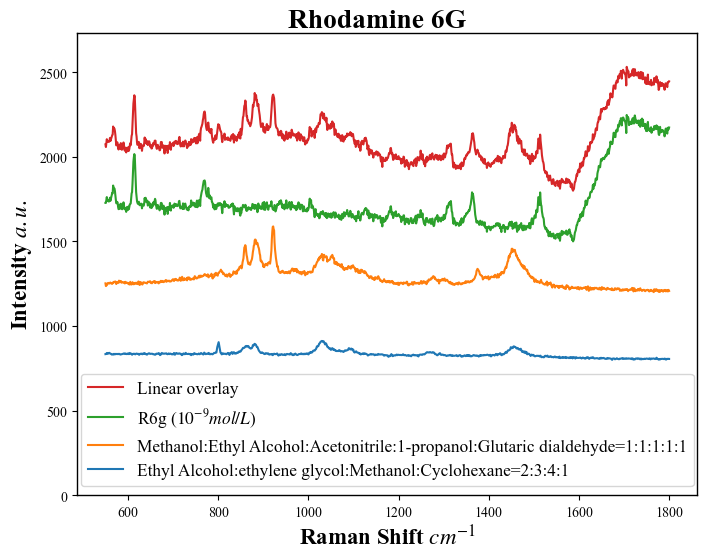

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from matplotlib.patches import ConnectionPatch
import matplotlib.lines as lines
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
plt.rcParams['axes.linewidth'] = 1  # 图框宽度
#plt.rcParams['figure.dpi'] = 300  # plt.show显示分辨率
plt.rcParams['mathtext.fontset'] = 'stix' # 公式的字体可以是这样 formula font
''''''
font = {'family': 'serif',
        'serif': 'Times New Roman', 
        'weight': 'normal',
        }
plt.rc('font', **font)
#matplotlib.use('TKAgg')

def norm(data):
    data = (data - np.min(data)) / ( np.max(data) - np.min(data) )
    return data

def add_trace_noise(raman_shift,scale=1000):

    # 给数据添加一些随机的基线噪声，噪声的幅度可以通过scale参数调整
    #scale = 10 # 噪声幅度
    noise = np.random.normal(0, scale, size=len(raman_shift)) # 生成正态分布的噪声
    y_noise = noise # 噪声叠加到数据上
    window_length = 2048 # 滤波窗口的长度，必须是奇数
    polyorder = 4 # 拟合多项式的阶数
    y_smooth = savgol_filter(y_noise, window_length, polyorder) # 平滑滤波
    min_y_smooth = np.min(y_smooth)
    abs_y_smooth = abs(min_y_smooth) + y_smooth
    #abs_y_smooth = (abs_y_smooth - np.min(abs_y_smooth) )/( np.max(abs_y_smooth) - np.min(abs_y_smooth) )
    noisy_data = abs_y_smooth
    #noisy_data =  (noisy_data - np.min(noisy_data) )/( np.max(noisy_data) - np.min(noisy_data) )

    return noisy_data

# 找到英文名
datapath = 'Rhodamine 6G.csv'
basename = datapath.split('.')[0]

# 数据前处理
data = pd.read_csv(datapath, header=None)
Raman_Shift = data.iloc[:,0].values
Intensity_4 = data.iloc[:,1].values
Intensity_5 = data.iloc[:,2].values
Intensity_6 = data.iloc[:,3].values
Intensity_7 = data.iloc[:,4].values
Intensity_8 = data.iloc[:,5].values
Intensity_9 = data.iloc[:,6].values
y4 = Intensity_4 - np.min(Intensity_4)+ 20000
y5 = Intensity_5 - np.min(Intensity_5)+ 19000
y6 = Intensity_6 - np.min(Intensity_6)+ 18000
y7 = Intensity_7 - np.min(Intensity_7)+ 17000
y8 = Intensity_8 - np.min(Intensity_8)+ 16000
y9 = Intensity_9 - np.min(Intensity_9)+ 15000


# 随机叠加数据
random_data_path = r'..\data\乙醇-乙二醇-甲醇-环己烷#2-3-4-1\10-26-10-26-乙醇-乙二醇-甲醇-环己烷#2-3-4-1_30.csv'
#random_data_path = r'D:\study_data\problem\化学计量学-峰值提取\data\13_乙醇-乙腈-环己烷#4-1-1\13_乙醇-乙腈-环己烷#4-1-12.csv'
random_data_path_2 = r'..\data\15_甲醇-乙醇-乙腈-正丙醇-戊二醛#1-1-1-1-1\15_甲醇-乙醇-乙腈-正丙醇-戊二醛#1-1-1-1-1_0.csv'
randomcsv = pd.read_csv(random_data_path, header=None)
random_data = randomcsv.iloc[350:1601,1].values
#random_data = norm(random_data)
randomcsv_2 = pd.read_csv(random_data_path_2, header=None)
random_data_2 = randomcsv_2.iloc[350:1601,1].values

final_data = random_data + Intensity_9 + random_data_2 # 最终的叠加数据

fig, axs = plt.subplots(1,1, figsize=(8, 6))#
fig.suptitle(basename, x = 0.5, y = 0.92, color = 'black',fontweight= 'bold',fontsize=19.8)# 设置总标题，x,y调整位置


axs.plot(Raman_Shift, random_data-np.min(random_data)+800,label='Ethyl Alcohol:ethylene glycol:Methanol:Cyclohexane=2:3:4:1') # Methanol:Ethyl Alcohol:Acetonitrile:1-propanol:Glutaric dialdehyde=1:1:1:1:1
axs.plot(Raman_Shift, random_data_2-np.min(random_data_2) + 1200,label='Methanol:Ethyl Alcohol:Acetonitrile:1-propanol:Glutaric dialdehyde=1:1:1:1:1')
axs.plot(Raman_Shift, Intensity_9-np.min(Intensity_9)+1500,label= 'R6g ($10^{-9} mol/L$)') # R6G
axs.plot(Raman_Shift, final_data-min(final_data)+1800, label= 'Linear overlay') # linear overlay

axs.set_ylim(0, np.max(final_data-min(final_data)+1800)+200)
#axs.set_xticks(fontsize=20)
axs.set_xlabel('Raman Shift ${cm}^{-1}$',fontsize=16.5,fontweight= 'black')
axs.set_ylabel('Intensity ${a.u.}$',fontsize=16.5,fontweight= 'black')

# 获得图例句柄
handles, labels = plt.gca().get_legend_handles_labels()
order = [3,2,1,0]
#order = [0,1,2,3]
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order],
           prop={'size':12.5},loc="lower center",
           labelspacing=0.5, borderpad=0.4
            ) #ncol = 2, columnspacing=0.3

#fig.savefig('random_data.jpg',dpi=300, bbox_inches='tight')
#fig.savefig('random_data.tif', format="tif",dpi=300,bbox_inches='tight')#,pad_inches=0.2

